In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

file_path = 'Friday-WorkingHours-Morning.pcap_ISCX.csv'
df = pd.read_csv(file_path)
# Veri kümesini yeniden yükleyelim
#df=pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv',dtype=str, encoding="utf-8", header=None)



In [2]:
df.columns = [
       ' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min',
       ' Label'
]

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [4]:
df = df.drop(df.index[0])

# İlk satır kaldırıldıktan sonra veri setini kontrol edelim
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1,389,112740560,32,16,6448,5056,403,0,201.500000,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.000000,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.000000,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.000000,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
5,88,617,7,4,484,414,233,0,69.142857,111.967895,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191032 entries, 1 to 191032
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             191032 non-null  int64  
 1    Flow Duration                191032 non-null  int64  
 2    Total Fwd Packets            191032 non-null  int64  
 3    Total Backward Packets       191032 non-null  int64  
 4   Total Length of Fwd Packets   191032 non-null  int64  
 5    Total Length of Bwd Packets  191032 non-null  int64  
 6    Fwd Packet Length Max        191032 non-null  int64  
 7    Fwd Packet Length Min        191032 non-null  int64  
 8    Fwd Packet Length Mean       191032 non-null  float64
 9    Fwd Packet Length Std        191032 non-null  float64
 10  Bwd Packet Length Max         191032 non-null  int64  
 11   Bwd Packet Length Min        191032 non-null  int64  
 12   Bwd Packet Length Mean       191032 non-nul

In [6]:
# Eksik verileri kontrol etme
missing_values = df.isnull().sum()

# Eksik verileri doldurma veya temizleme
df.fillna(0, inplace=True)

missing_values_after = df.isnull().sum()


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[' Label']= encoder.fit_transform(df[' Label'])

In [8]:
df[' Label'].unique()

array([0, 1])

In [9]:
# Etiket sütununu belirleme (örneğin 'Label' sütunu varsa)
df.iloc[:,-1].value_counts()


 Label
0    189066
1      1966
Name: count, dtype: int64

In [10]:
df.drop(df.loc[df[' Label'] == ' Label'].index, inplace=True)

In [11]:
import numpy as np

# Sonsuz ve çok büyük değerleri tespit etme
infinity_values = df.replace([np.inf, -np.inf], np.nan).isnull().sum()

# Sonsuz ve çok büyük değerleri 0 ile değiştirme veya ortalama değer ile doldurma
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Eksik verileri kontrol etme (temizlendikten sonra)
missing_values_after_cleaning = df.isnull().sum()


In [12]:
df = df.replace([np.inf, -np.inf], np.nan)
# Count nan values
df.isna().sum().sum()

0

In [13]:
df.dropna(inplace=True)
df.isna().sum().sum()
df.shape

(191032, 79)

In [14]:
df = df.fillna(0)  # Replace NaN with 0
df = df.replace([np.inf, -np.inf], 0)

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(184144, 79)

In [16]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [17]:
print("Read {} rows.".format(len(df)))
print("The number of data points are:", df.shape[0])
print("The number of features are:", df.shape[1])
output=df[' Label'].values
labels=set(output)
print("The different type of output labels are:", labels)
print("The number of different output labels are:", len(labels))

Read 184144 rows.
The number of data points are: 184144
The number of features are: 79
The different type of output labels are: {0, 1}
The number of different output labels are: 2


<Axes: xlabel=' Label'>

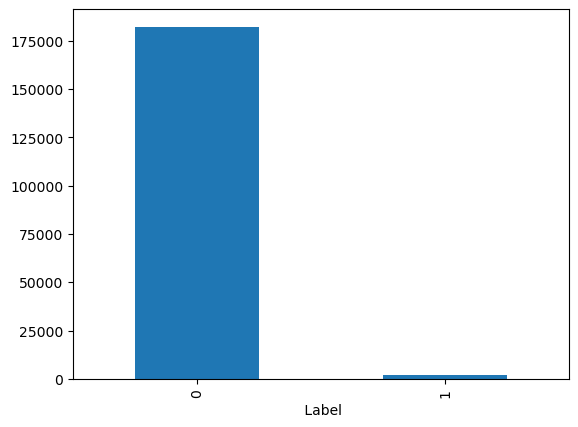

In [18]:
df[' Label'].value_counts().plot.bar()

In [19]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(' Label',axis=1)
y = df[' Label']

In [20]:
df[' Label'].value_counts(normalize=True)

 Label
0    0.989394
1    0.010606
Name: proportion, dtype: float64

In [21]:
df[0:5]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1,389,112740560,32,16,6448,5056,403,0,201.500000,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,0
2,0,113757377,545,0,0,0,0,0,0.000000,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,0
3,5355,100126,22,0,616,0,28,28,28.000000,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
4,0,54760,4,0,0,0,0,0,0.000000,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
5,88,617,7,4,484,414,233,0,69.142857,111.967895,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0


In [22]:
df.describe(include=['object', 'float', 'int'])

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,184144.000000,1.841440e+05,184144.000000,184144.000000,1.841440e+05,1.841440e+05,184144.000000,184144.000000,184144.000000,184144.000000,...,184144.000000,1.841440e+05,1.841440e+05,1.841440e+05,1.841440e+05,1.841440e+05,1.841440e+05,1.841440e+05,1.841440e+05,184144.000000
mean,6999.135888,1.207232e+07,14.252427,16.991577,6.191160e+02,2.944414e+04,180.280063,23.856265,52.864571,52.046497,...,25.630273,8.917865e+04,5.584291e+04,1.903640e+05,5.798806e+04,4.062798e+06,1.816141e+05,4.198824e+06,3.885107e+06,0.010606
std,16955.817649,3.118031e+07,1118.098790,1507.215509,8.070243e+03,3.375964e+06,563.941639,42.033905,118.856366,163.134267,...,6.395832,8.840597e+05,5.019730e+05,1.357957e+06,7.769167e+05,1.411749e+07,2.207345e+06,1.448187e+07,1.393782e+07,0.102437
min,0.000000,-1.200000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,53.000000,2.070000e+02,2.000000,1.000000,4.200000e+01,6.000000e+00,30.000000,0.000000,18.500000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.000000,3.274750e+04,2.000000,2.000000,7.000000e+01,1.580000e+02,42.000000,23.000000,39.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,443.000000,5.943752e+05,4.000000,2.000000,1.680000e+02,3.560000e+02,69.000000,42.000000,51.500000,21.920310,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
max,64948.000000,1.200000e+08,207964.000000,284602.000000,1.235152e+06,6.270000e+08,24820.000000,2325.000000,5940.857143,7049.469004,...,56.000000,1.060000e+08,5.040000e+07,1.060000e+08,1.060000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08,1.000000


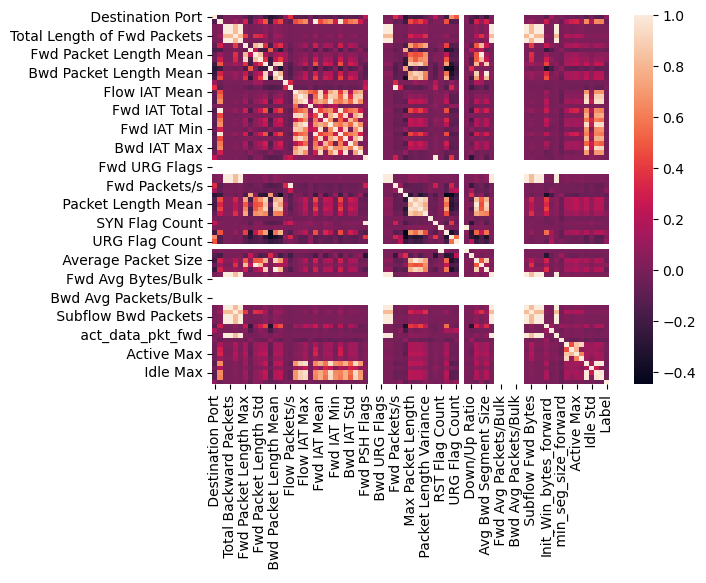

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())
plt.show()

In [24]:
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

 Flow Duration Fwd IAT Total 0.9977837589817828
 Total Fwd Packets  Total Backward Packets 0.9995898925499295
 Total Fwd Packets  Total Length of Bwd Packets 0.9974689331696855
 Total Fwd Packets  Fwd Header Length 0.9988653748194837
 Total Fwd Packets  Bwd Header Length 0.9982573090687212
 Total Fwd Packets  Fwd Header Length.1 0.9988653748194837
 Total Fwd Packets Subflow Fwd Packets 1.0
 Total Fwd Packets  Subflow Bwd Packets 0.9995898925499295
 Total Fwd Packets  Subflow Bwd Bytes 0.9974733194266658
 Total Fwd Packets  act_data_pkt_fwd 0.9964007691911327
 Total Backward Packets  Total Length of Bwd Packets 0.9962359094559651
 Total Backward Packets  Fwd Header Length 0.9985258347814386
 Total Backward Packets  Bwd Header Length 0.9988204076743427
 Total Backward Packets  Fwd Header Length.1 0.9985258347814386
 Total Backward Packets Subflow Fwd Packets 0.9995898925499295
 Total Backward Packets  Subflow Bwd Packets 1.0
 Total Backward Packets  Subflow Bwd Bytes 0.996240066711689
 T

In [25]:
df = df.drop(columns=correlated_vars)

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[' Label'])
feature_list = list(X.columns)
X = np.array(X)
y = df[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 147315
Testing set: 36829


In [28]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
# Gradient Boosting modelini oluşturma
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9988867468570963
Precision: 0.998874904105715
Recall: 0.9988867468570963
F1 Score: 0.9988662466931487


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression modelini oluşturun
log_clf = LogisticRegression(max_iter=100000, random_state=42)

# Modeli eğitin
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=100000, random_state=42)

In [32]:
y_pred = log_clf.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.994406581769801
Precision: 0.993965097552878
Recall: 0.994406581769801
F1 Score: 0.9940594701797435


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_pred = knn_clf.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9972847484319423
Precision: 0.9972914969431566
Recall: 0.9972847484319423
F1 Score: 0.997288063321536


In [35]:
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=42)  # 1000 ağaçla eğitiyoruz

# Modeli eğitin
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [36]:
y_pred = rnd_clf.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9995112547177496
Precision: 0.9995114961198044
Recall: 0.9995112547177496
F1 Score: 0.999505747098943


In [37]:
svm_clf = SVC(max_iter=10000, random_state=42)

# Modeli eğitin
svm_clf.fit(X_train, y_train)


SVC(max_iter=10000, random_state=42)

In [38]:
y_pred = svm_clf.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9954655298813435
Precision: 0.9952455017860428
Recall: 0.9954655298813435
F1 Score: 0.9950308878820188


In [39]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Modeli eğitin
ada_clf.fit(X_train, y_train)

C:\Users\berke\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [40]:
y_pred = ada_clf.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.999809932390236
Precision: 0.9998109286242163
Recall: 0.999809932390236
F1 Score: 0.9998102800195859


In [41]:
decision_clf = DecisionTreeClassifier()

# Modeli eğitin
decision_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = decision_clf.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9997284748431943
Precision: 0.9997284748431943
Recall: 0.9997284748431943
F1 Score: 0.9997284748431943


In [43]:
gaus_clf = GaussianNB()

# Modeli eğitin
gaus_clf.fit(X_train, y_train)

GaussianNB()

In [44]:
y_pred = gaus_clf.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8221238697765348
Precision: 0.9896675835211676
Recall: 0.8221238697765348
F1 Score: 0.892508790704318


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical


In [46]:
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(147315, 58, 1) (36829, 58, 1) (147315,) (36829,)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import layers
import numpy as np
import keras

# Ensure 'X_train' and 'y_train' are defined before this block of code

model = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/20


C:\Users\berke\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4604/4604 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9828 - loss: 1684.6924 - val_accuracy: 0.9882 - val_loss: 2401.1121
Epoch 2/20
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9846 - loss: 981.1445 - val_accuracy: 0.9692 - val_loss: 85.2876
Epoch 3/20
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9891 - loss: 611.2923 - val_accuracy: 0.9953 - val_loss: 38.4102
Epoch 4/20
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9909 - loss: 28.2714 - val_accuracy: 0.9856 - val_loss: 22.0180
Epoch 5/20
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9911 - loss: 53.7173 - val_accuracy: 0.9954 - val_loss: 6.4046
Epoch 6/20
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9927 - loss: 31.3786 - val_accuracy: 0.9866 - val_loss: 1.9224
Epoch 7/20
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9915 - loss: 31.0181 - val_accuracy: 0.9879 - val_loss: 0.8927
Epoch 8/20
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9932 - l

In [48]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

1151/1151 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Accuracy: 0.9900350267452279
Precision: 0.9801693541824242
Recall: 0.9900350267452279
F1 Score: 0.9850774896013017


C:\Users\berke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(147315, 58, 1) (36829, 58, 1) (147315,) (36829,)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import layers
import numpy as np
import keras

# Ensure 'X_train' and 'y_train' are defined before this block of code

model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    layers.LSTM(64),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


C:\Users\berke\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 156s 33ms/step - accuracy: 0.9889 - loss: 0.0451 - val_accuracy: 0.9953 - val_loss: 0.0174
Epoch 2/10
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 140s 30ms/step - accuracy: 0.9942 - loss: 0.0190 - val_accuracy: 0.9957 - val_loss: 0.0153
Epoch 3/10
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 137s 30ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9932 - val_loss: 0.0188
Epoch 4/10
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 142s 31ms/step - accuracy: 0.9952 - loss: 0.0154 - val_accuracy: 0.9958 - val_loss: 0.0143
Epoch 5/10
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 216s 47ms/step - accuracy: 0.9947 - loss: 0.0161 - val_accuracy: 0.9959 - val_loss: 0.0132
Epoch 6/10
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 223s 49ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9959 - val_loss: 0.0131
Epoch 7/10
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 232s 50ms/step - accuracy: 0.9949 - loss: 0.0148 - val_accuracy: 0.9952 - val_loss: 0.0141
Epoch 8/10
4604/4604 ━━━━━━━━━━━━━━━━━━━━ 313s 68ms/step - accuracy: 

In [51]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

1151/1151 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step
Accuracy: 0.9960085801949551
Precision: 0.9958893361703135
Recall: 0.9960085801949551
F1 Score: 0.9955865727688665
